In [1]:
%pwd
%cd ../..

/Users/ryandevera/data-science/umn_environments/Deeplifting


In [2]:
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from deeplifting.problems import PROBLEMS_BY_NAME
from deeplifting.optimization import (
    run_deeplifting,
    run_differential_evolution,
    run_dual_annealing,
    run_ipopt,
    run_pygranso,
)
from deeplifting.utils import create_optimization_plot

In [3]:
problem_name = 'ackley'
problem = PROBLEMS_BY_NAME[problem_name]

In [4]:
# # Run pygranso
# outputs = run_pygranso(problem, trials=10)

In [5]:
outputs = run_deeplifting(problem, trials=10, model_type='mlp_skip')

n_gpus: 0
cpu


╔═════ QP SOLVER NOTICE ════════════════════════════════════════════════════════════════════════╗
║  PyGRANSO requires a quadratic program (QP) solver that has a quadprog-compatible interface,  ║
║  the default is osqp. Users may provide their own wrapper for the QP solver.                  ║
║  To disable this notice, set opts.quadprog_info_msg = False                                   ║
╚═══════════════════════════════════════════════════════════════════════════════════════════════╝
══════════════════════════════════════════════════════════════════════════════════════════════╗
PyGRANSO: A PyTorch-enabled port of GRANSO with auto-differentiation                          ║ 
Version 1.2.0                                                                                 ║ 
Licensed under the AGPLv3, Copyright (C) 2021-2022 Tim Mitchell and Buyun Liang               ║ 
══════════════════════════════════════════════════════════════════════════════════════════════╣
Problem spe

/Users/ryandevera/.virtualenvs/deeplifing/lib/python3.9/site-packages/pygranso/private/bfgsHessianInverseLimitedMem.py:237: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3575.)
  alpha[j,:]  = self.rho[0,j] * (self.S[:,j].T  @ q)


  10 ║  - │   -   ║  5.0822005e-05 ║   -  │   -  ║ QN │     2 │ 0.500000 ║     1 │ 7.84e-08   ║ 
  20 ║  - │   -   ║  1.7497930e-07 ║   -  │   -  ║ QN │     3 │ 0.250000 ║     1 │ 6.05e-10   ║ 
═════╩════════════╩════════════════╩═════════════╩═══════════════════════╩════════════════════╣
F = final iterate, B = Best (to tolerance), MF = Most Feasible                                ║ 
Optimization results:                                                                         ║ 
═════╦════════════╦════════════════╦═════════════╦═══════════════════════╦════════════════════╣
   F ║    │       ║ -3.0194393e-08 ║   -  │   -  ║    │       │          ║       │            ║ 
   B ║    │       ║ -3.0194393e-08 ║   -  │   -  ║    │       │          ║       │            ║ 
═════╩════════════╩════════════════╩═════════════╩═══════════════════════╩════════════════════╣
Iterations:              22                                                                   ║ 
Function evaluations:    64      

In [6]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [7]:
results = outputs['final_results']

In [8]:
results

[(-1.2422326278738183e-08, -1.372237079522165e-08, -3.019439276386038e-08)]

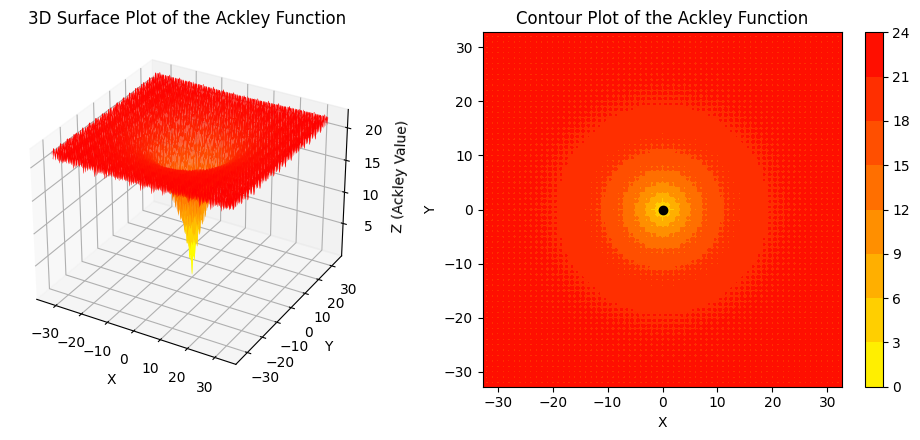

In [9]:
fig = create_optimization_plot(problem_name, problem, results, colormap='autumn_r')

In [ ]:
fig.savefig(
    '/Users/ryandevera/data-science/umn_environments/Deeplifting'
    f'/images/{problem_name}_surface_and_contour-autumn.png'
)